In [1]:
import numpy as np
from magtense.micromag import MicromagProblem
from magtense.utils import plot_M_thin_film

In [2]:
# GPU usage
cuda = True

# Other constants
mu0 = 4 * np.pi * 1e-7 # [H/m]
res = (36, 9, 1) # Number of cells in x, y, z directions
grid_L = [500e-9, 125e-9, 3e-9] # [m]

In [3]:
### Magnetization to s-state
problem_ini = MicromagProblem(
    res=res, grid_L=grid_L, m0=1 / np.sqrt(3), alpha=4.42e3, cuda=cuda, cvode=False
)
h_ext = np.array([1, 1, 1]) / mu0

def h_ext_fct(t) -> np.ndarray:
    return np.expand_dims(np.where(t < 1e-09, 1e-09 - t, 0), axis=1) * h_ext

_, M_out, _, _, _, _, _ = problem_ini.run_simulation(100e-9, 200, h_ext_fct, 2000)
print("Shape of magnetization vector coming from MagTense:", M_out.shape)

 Initializing matrices
Shape of magnetization vector coming from MagTense: (200, 324, 1, 3)
 Copying to CUDA
 Initializing solution
 Running solution
 Time:     4.52 ns, i.e. step   10/ 200
 Time:     9.55 ns, i.e. step   20/ 200
 Time:    14.57 ns, i.e. step   30/ 200
 Time:    19.60 ns, i.e. step   40/ 200
 Time:    24.62 ns, i.e. step   50/ 200
 Time:    29.65 ns, i.e. step   60/ 200
 Time:    34.67 ns, i.e. step   70/ 200
 Time:    39.70 ns, i.e. step   80/ 200
 Time:    44.72 ns, i.e. step   90/ 200
 Time:    49.75 ns, i.e. step  100/ 200
 Time:    54.77 ns, i.e. step  110/ 200
 Time:    59.80 ns, i.e. step  120/ 200
 Time:    64.82 ns, i.e. step  130/ 200
 Time:    69.85 ns, i.e. step  140/ 200
 Time:    74.87 ns, i.e. step  150/ 200
 Time:    79.90 ns, i.e. step  160/ 200
 Time:    84.92 ns, i.e. step  170/ 200
 Time:    89.95 ns, i.e. step  180/ 200
 Time:    94.97 ns, i.e. step  190/ 200
 Time:   100.00 ns, i.e. step  200/ 200


In [4]:
Mx = np.mean(M_out[..., 0], axis=1)
My = np.mean(M_out[..., 1], axis=1)
Mz = np.mean(M_out[..., 2], axis=1)
print("[Init] Mean Mx, My, Mz:", Mx[0], My[0], Mz[0])
print("[s-state] Mean Mx, My, Mz:", Mx[-1], My[-1], Mz[-1])


[Init] Mean Mx, My, Mz: [0.57735027] [0.57735027] [0.57735027]
[s-state] Mean Mx, My, Mz: [0.98472375] [0.08741604] [1.04713163e-19]


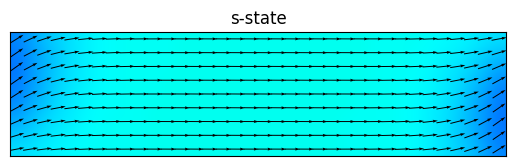

In [5]:
plot_M_thin_film(M_out[-1], res, "s-state")